In [5]:
import cv2 as cv

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import math

In [105]:
def guassion_curnel(size, sigma):
    GaussKernel = np.zeros((size, size))
    padding = size // 2
    for i in range(size):
        for j in range(size):
            xxAddyy = math.pow(i - padding, 2) + math.pow(j - padding, 2)
            GaussKernel[i, j] = math.exp(-xxAddyy / (2 * math.pow(sigma, 2))) / 2 * math.pi * math.pow(sigma, 2)
    thesum = np.sum(GaussKernel)
    GaussKernel = GaussKernel / thesum
    return GaussKernel

In [106]:
guassion_curnel(5,0.8)

array([[0.00048091, 0.00501119, 0.01094545, 0.00501119, 0.00048091],
       [0.00501119, 0.0522178 , 0.11405416, 0.0522178 , 0.00501119],
       [0.01094545, 0.11405416, 0.2491172 , 0.11405416, 0.01094545],
       [0.00501119, 0.0522178 , 0.11405416, 0.0522178 , 0.00501119],
       [0.00048091, 0.00501119, 0.01094545, 0.00501119, 0.00048091]])

In [180]:
def vasiualzation_kernel(kernel,variance):
    size = len(kernel)
    lenth = (size + 1)/2
    X = np.arange(-1*lenth, lenth+0.1, 0.1,dtype=np.float64).reshape(-1,1)
    Y = np.arange(-1*lenth, lenth+0.1, 0.1,dtype=np.float64)
    mux,muy=0,0
    expont = -0.5*(((X-mux)/variance)**2 + ((Y-muy)/variance)**2)
    Z=np.exp(expont)/(2*np.pi*variance*variance)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.viridis)
    plt.show()

In [181]:
kernel_guassion = guassion_curnel(5,0.8)

/tmp/ipykernel_6013/2373112088.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


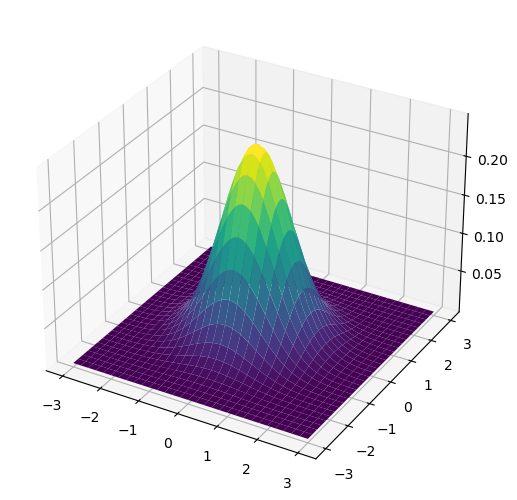

In [183]:
vasiualzation_kernel(kernel_guassion,0.8)

In [179]:
def conv(image, kernel):
    height, width = image.shape
    h, w = kernel.shape
    # 经滑动卷积操作后得到的新的图像的尺寸
    new_h = height -h + 1
    new_w = width -w + 1
    new_image = np.zeros((new_h, new_w), dtype=float)
    # 进行卷积操作,实则是对应的窗口覆盖下的矩阵对应元素值相乘,卷积操作
    for i in range(new_w):
        for j in range(new_h):
            new_image[i, j] = np.sum(image[i:i+h, j:j+w] * kernel)
    new_image = new_image.clip(0, 255)
    new_image = np.rint(new_image).astype('uint8')
    return new_image

In [120]:
def convolution(kernel):
    A = Image.open("img2.jpg", 'r')
    a = np.array(A)
    R = conv(a[:, :, 0], kernel)
    G = conv(a[:, :, 1], kernel)
    B = conv(a[:, :, 2], kernel)
    I = np.stack((R, G, B), axis=2)
    image = Image.fromarray(I)
    plt.imshow(image)
    plt.show()

In [121]:
np.array(Image.open("img2.jpg",'r'))[:,:,0]

array([[ 32,  35,  35, ..., 196, 197, 194],
       [ 26,  31,  35, ..., 195, 191, 189],
       [ 36,  34,  33, ..., 196, 196, 192],
       ...,
       [253, 251, 252, ...,  19,  21,  22],
       [253, 254, 255, ...,  20,  20,  20],
       [255, 255, 255, ...,  19,  20,  21]], dtype=uint8)

In [122]:
conv(np.array(Image.open("img2.jpg",'r'))[:,:,0], kernel)

array([[ 33,  33,  33, ..., 194, 195, 195],
       [ 33,  33,  34, ..., 194, 194, 195],
       [ 34,  35,  34, ..., 193, 193, 194],
       ...,
       [253, 252, 249, ...,  21,  21,  21],
       [252, 251, 249, ...,  19,  20,  21],
       [252, 252, 250, ...,  19,  19,  20]], dtype=uint8)

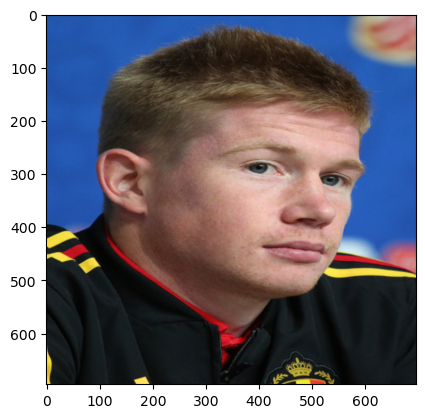

In [136]:
convolution(kernel_guassion)

# A = Image.open("img2.jpg", 'r')
# a = np.array(A)
# print(a.shape)
# image = Image.fromarray(a)
# plt.imshow(image)
# plt.show()

In [137]:
kernel_sobel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

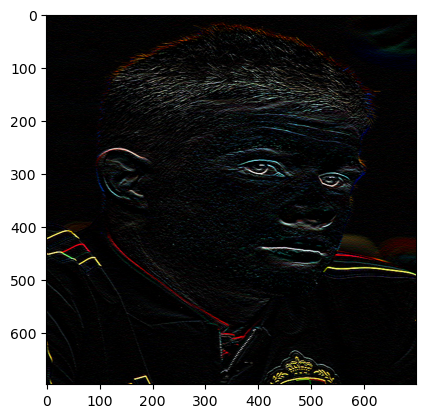

In [134]:
convolution(kernel_sobel)

In [154]:
A = Image.open("img2.jpg", 'r')
a = np.array(A)
img = a[:, :, 0]
img_height, img_width = img.shape
print(img_height,img_width)

700 700


In [158]:
def boundaryZeroPadding(img, kernel_size):
    img_height, img_width = img.shape
    kx, ky = kernel_size[1]//2, kernel_size[0]//2
    zeros_array = np.zeros((img_height, kx), dtype=np.uint8)
    img_copy = np.concatenate([zeros_array, img, zeros_array], axis=1)
    zeros_array = np.zeros((ky, 2*kx + img_width), dtype=np.uint8)
    img_result = np.concatenate([zeros_array, img_copy, zeros_array], axis=0)
    return img_result

(700, 700)
(700, 700)
(700, 700)


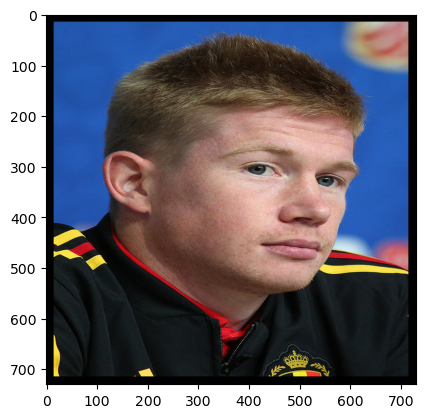

In [163]:
kernel = guassion_curnel(31,0.5)
A = Image.open("img2.jpg", 'r')
a = np.array(A)
R = boundaryZeroPadding(a[:, :, 0], kernel.shape)
G = boundaryZeroPadding(a[:, :, 1], kernel.shape)
B = boundaryZeroPadding(a[:, :, 2], kernel.shape)
I = np.stack((R, G, B), axis=2)
image = Image.fromarray(I)
plt.imshow(image)
plt.show()

In [164]:
def boundaryReflect(img, kernel_size):
    '''
    img         :   要填充的img
    kernel_size :   你kernel的形状，(先行后列)与kernel.shape顺序相反
    shape       :   填充的类型
    返回值为 Reflect 后的图片
    '''
    img_height, img_width = img.shape
    kx, ky = kernel_size[1]//2, kernel_size[0]//2
    part_D = img[(ky-1)::-1, :]
    part_C = img[-1:-(ky+1):-1, :]
    part_DXC = np.concatenate([part_D, img, part_C], axis=0)
        # 通过对称求 EAG 和 FBH
    part_EAG = part_DXC[:, (kx-1)::-1]
    part_FBH = part_DXC[:, -1:(-kx-1):-1]
        # 合并
    img_result = np.concatenate([part_EAG, part_DXC, part_FBH], axis=1)
    return img_result

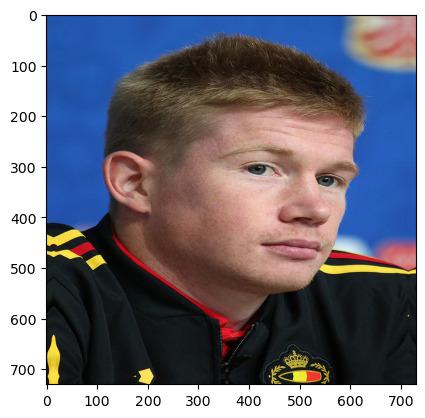

In [165]:
kernel = guassion_curnel(31,0.5)
A = Image.open("img2.jpg", 'r')
a = np.array(A)
R = boundaryReflect(a[:, :, 0], kernel.shape)
G = boundaryReflect(a[:, :, 1], kernel.shape)
B = boundaryReflect(a[:, :, 2], kernel.shape)
I = np.stack((R, G, B), axis=2)
image = Image.fromarray(I)
plt.imshow(image)
plt.show()